In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
#Importing Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#Importing Tree models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

#Tree Visualizer
from sklearn.tree import plot_tree

In [3]:
TrainDataMain = pd.read_csv("D:/Utkarsh Folder/IITM materials/MS4610/Working on the project/Main project work/TrainingData.csv")
TestDataMain = pd.read_csv("D:/Utkarsh Folder/IITM materials/MS4610/Working on the project/Main project work/testX.csv")

#Make copies of these to work on
train_df = TrainDataMain.copy()
test_df = TestDataMain.copy()

train_df.info()

C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_332\3634472474.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  TrainDataMain = pd.read_csv("D:/Utkarsh Folder/IITM materials/MS4610/Working on the project/Main project work/TrainingData.csv")
C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_332\3634472474.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  TestDataMain = pd.read_csv("D:/Utkarsh Folder/IITM materials/MS4610/Working on the project/Main project work/testX.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  83000 non-null  int64  
 1   mvar1            83000 non-null  object 
 2   mvar2            77114 non-null  float64
 3   mvar3            82465 non-null  float64
 4   mvar4            82465 non-null  float64
 5   mvar5            82465 non-null  float64
 6   mvar6            83000 non-null  object 
 7   mvar7            83000 non-null  object 
 8   mvar8            83000 non-null  object 
 9   mvar9            83000 non-null  object 
 10  mvar10           83000 non-null  object 
 11  mvar11           83000 non-null  object 
 12  mvar12           83000 non-null  object 
 13  mvar13           83000 non-null  object 
 14  mvar14           83000 non-null  int64  
 15  mvar15           83000 non-null  object 
 16  mvar16           83000 non-null  object 
 17  mvar17      

In [4]:
def change_columns(df):

    columns_list = df.columns.values.tolist() # it will output the list of all columns

    for i in columns_list : # Iterate through each column and it will change each column to 'nan' if it is not a number
        if i != 'mvar47':
            df[i] = pd.to_numeric(df[i], errors='coerce')
        else:
            df[i] = df[i].apply( lambda x: ['C','L'].index(x) if x in ['C','L'] else np.nan )
    return df

transformed_train_df = change_columns(train_df)
transformed_test_df = change_columns(test_df)

In [5]:
median_train = transformed_train_df.fillna( transformed_train_df.median() )
median_test = transformed_test_df.fillna( transformed_test_df.median() )

<AxesSubplot:>

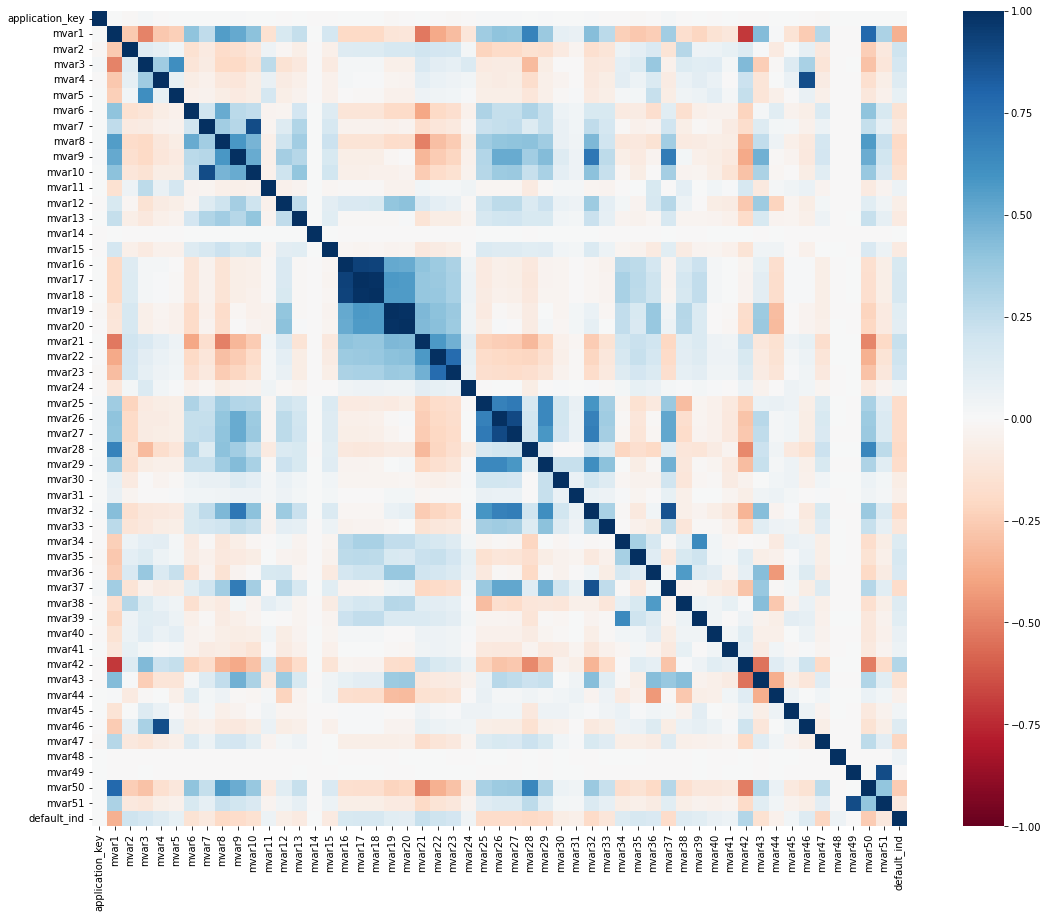

In [6]:
Correlation_Matrix = median_train.corr()
plt.figure(figsize=(20,15))
sns.heatmap(Correlation_Matrix, vmin= -1, vmax=1, annot=False, fmt='0.1f', square=True, cmap='RdBu')

<AxesSubplot:>

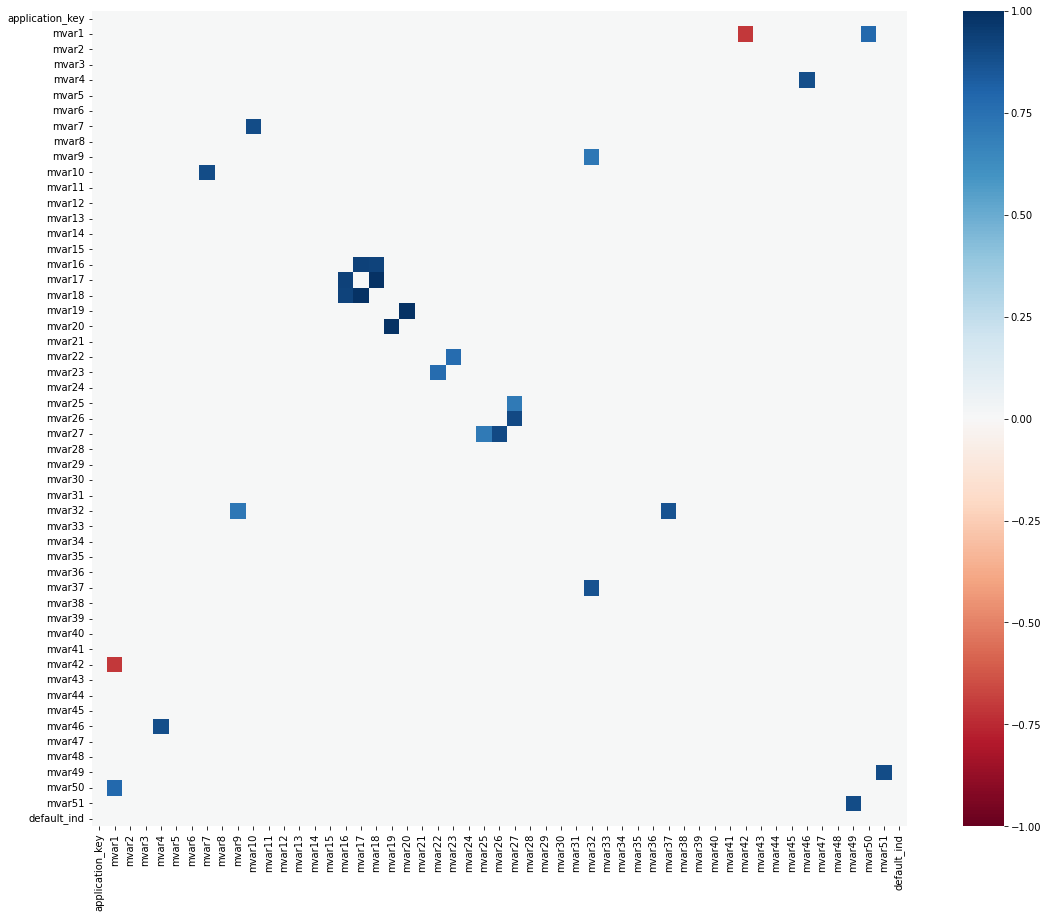

In [7]:
CM = Correlation_Matrix.copy() - np.identity(53)

CM[(CM < 0.7) & (CM > -0.7)] = 0

plt.figure(figsize=(20,15))
sns.heatmap(CM, vmin= -1, vmax=1, annot=False, fmt='0.1f', square=True, cmap='RdBu')

In [8]:
# columns_list = []

# def columns(df):
#     columns_list.append(df.columns.values.tolist())

# columns(transformed_train_df)

# x = list(range(0,53))
# x.remove(47)

# lst = []
# for i in x:
#     for j in x:
#         if j > i:
#             if CM.iat[i,j] != 0:
#                 lst.append([columns_list[i],columns_list[j]])

# print(lst)

In [9]:
Y_values = median_train['default_ind']
X_values = median_train.drop(['default_ind'], axis='columns', inplace=False)
train_median_train, test_median_train, Ytrain, Ytest = train_test_split(X_values, Y_values, test_size=0.2, random_state=1729, shuffle=True)

In [10]:
StdScale = StandardScaler()
for i in list(range(1,52)):
    train_median_train['mvar%d'%i] = StdScale.fit_transform(train_median_train[['mvar%d'%i]])
    test_median_train['mvar%d'%i] = StdScale.transform(test_median_train[['mvar%d'%i]])

In [11]:
# Using Logistic_regression

classifier_Lg = LogisticRegression(random_state=0)
classifier_Lg.fit(train_median_train,Ytrain)
y_pred_Lg = classifier_Lg.predict(test_median_train)
print(f" F1_score : {f1_score(Ytest,y_pred_Lg)} , accuracy score : {accuracy_score(Ytest,y_pred_Lg)} ")

 F1_score : 0.0 , accuracy score : 0.7183132530120482 


In [12]:
KNN = KNeighborsClassifier(n_neighbors= 5)
KNN.fit(train_median_train,Ytrain)

YPredict_KNN = KNN.predict(test_median_train)
print(f" F1_score : {f1_score(Ytest,YPredict_KNN)} , accuracy score : {accuracy_score(Ytest,YPredict_KNN)} ")

 F1_score : 0.2550732807215333 , accuracy score : 0.681566265060241 


In [15]:
rf = RandomForestClassifier(random_state = 1729, class_weight = None).fit(train_median_train, Ytrain)
parameters = {'n_estimators':[10, 100, 300, 1000]}
clf_rf = GridSearchCV(rf, parameters, cv = 5).fit(train_median_train, Ytrain)
y_preds_rf = clf_rf.predict_proba(test_median_train)[:,1]
print(f" F1_score : {f1_score(Ytest,y_preds_rf)} , accuracy score : {accuracy_score(Ytest,y_preds_rf)} ")


KeyboardInterrupt: 